# Traffic Collision Severity Prediction Using Machine Learning

## 🎯 Project Objective
The objective of this project is to design and implement a **complete end-to-end machine learning pipeline** that predicts whether a traffic collision will result in a **severe outcome** (Serious or Fatal) using historical accident data.

This project is built to demonstrate real-world **data science and machine learning skills**, from raw data ingestion to model evaluation and interpretation, and is suitable for inclusion in a professional data science portfolio.

---

## 🧠 Business & Safety Context
Severe traffic accidents, while less frequent, have significant human, economic, and infrastructural impacts. Transportation agencies and highway authorities require data-driven tools to identify **high-risk conditions** and proactively improve road safety.

To support this goal, accident severity prediction is framed as a **binary classification problem**:
- **Severe Accident (1):** Serious or Fatal  
- **Non-Severe Accident (0):** Slight  

This formulation improves model stability, interpretability, and aligns with real-world safety and emergency response priorities.

---

## 🛠️ End-to-End Machine Learning Workflow

### 1️⃣ Data Collection & Loading
- Load raw traffic collision data from a public road safety dataset.
- Inspect dataset structure, data types, and missing values.

---

### 2️⃣ Data Cleaning & Preparation
- Remove identifier variables and post-accident fields to prevent data leakage.
- Handle missing values using appropriate statistical techniques.
- Convert accident severity into a binary target variable (`Severe_Accident`).

---

### 3️⃣ Feature Engineering
- Extract time-based features such as hour of day, nighttime indicator, and rush-hour periods.
- Prepare environmental, road, and traffic-related features.
- Encode categorical variables for machine learning compatibility.

---

### 4️⃣ Exploratory Data Analysis (EDA)
- Analyze class imbalance and severity distribution.
- Identify patterns and relationships across weather conditions, road characteristics, speed limits, and time of day.
- Visualize key trends influencing accident severity.

---

### 5️⃣ Model Development
- Train a baseline **Logistic Regression** model.
- Develop tree-based models such as **Random Forest** and **Gradient Boosting**.
- Address class imbalance using class weighting or resampling techniques.

---

### 6️⃣ Model Evaluation
- Evaluate models using metrics appropriate for imbalanced classification:
  - Recall (priority on severe accidents)
  - F1-score
  - Confusion matrix
- Compare performance across multiple models.

---

### 7️⃣ Model Interpretation & Insights
- Identify the most influential features contributing to severe accident outcomes.
- Translate model outputs into actionable insights for road safety and transportation planning.

---

## 📊 Final Deliverables
By the end of this project, the following deliverables are produced:

- A clean, machine-learning-ready dataset  
- A trained and evaluated classification model  
- Visual insights highlighting high-risk accident conditions  
- A reproducible Jupyter Notebook suitable for portfolio presentation  
- A GitHub-ready project demonstrating applied machine learning skills  

---

## 🚦 Real-World Impact
The results of this project can support:
- Road safety policy and planning
- Proactive identification of high-risk traffic conditions
- Emergency response and resource allocation
- Transportation infrastructure improvements

---

## 🔍 Tools & Technologies
- **Programming:** Python  
- **Data Processing:** Pandas, NumPy  
- **Modeling:** Scikit-learn  
- **Visualization:** Matplotlib, Seaborn  
- **Environment:** Jupyter Notebook  

---



In [1]:
!pip install matplotlib seaborn scikit-learn xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns



file_path = r"C:\Users\zoraw\Desktop\IBM Churn\Accident.csv"
df = pd.read_csv(file_path)

df.head()


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,04-01-2005,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,05-01-2005,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,NaN,30,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,06-01-2005,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,07-01-2005,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,NaN,10-01-2005,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30,21:13,Urban,Fine no high winds,2005,No


In [2]:
df.shape
df.shape
df.columns
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 34 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1048575 non-null  object 
 1   1st_Road_Class                               1048575 non-null  object 
 2   1st_Road_Number                              1048573 non-null  float64
 3   2nd_Road_Class                               608751 non-null   object 
 4   2nd_Road_Number                              1037772 non-null  float64
 5   Accident_Severity                            1048575 non-null  object 
 6   Carriageway_Hazards                          19741 non-null    object 
 7   Date                                         1048575 non-null  object 
 8   Day_of_Week                                  1048575 non-null  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  1

In [3]:

df.tail()


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
1048570,201091NM01760,A,95.0,NaN,0.0,Slight,NaN,18-02-2010,Thursday,1.0,...,Northern,Dry,Single carriageway,NaN,60,07:00,Rural,Fine no high winds,2010,Yes
1048571,201091NM01881,A,95.0,NaN,0.0,Slight,NaN,21-02-2010,Sunday,1.0,...,Northern,Frost or ice,Single carriageway,NaN,60,03:00,Rural,Fine no high winds,2010,Yes
1048572,201091NM01935,A,96.0,Unclassified,0.0,Slight,NaN,23-02-2010,Tuesday,1.0,...,Northern,Frost or ice,Single carriageway,NaN,30,09:38,Rural,Fine no high winds,2010,Yes
1048573,201091NM01964,A,9.0,Unclassified,0.0,Serious,NaN,23-02-2010,Tuesday,1.0,...,Northern,Wet or damp,Single carriageway,NaN,60,18:25,Rural,Fine no high winds,2010,Yes
1048574,201091NM02142,Unclassified,0.0,Unclassified,0.0,Serious,Other object on road,28-02-2010,Sunday,1.0,...,Northern,Wet or damp,Dual carriageway,NaN,60,15:45,Rural,Snowing no high winds,2010,Yes


In [4]:
# Map 'Accident_Severity' to binary target
severity_map = {
    'Slight': 0,
    'Serious': 1,
    'Fatal': 1
}

df['Severe_Accident'] = df['Accident_Severity'].map(severity_map)

# Check that the column is created
print(df[['Accident_Severity', 'Severe_Accident']].head())


  Accident_Severity  Severe_Accident
0           Serious                1
1            Slight                0
2            Slight                0
3            Slight                0
4            Slight                0


In [5]:
cols_to_drop = ['Accident_Index', 'Carriageway_Hazards', 'Special_Conditions_at_Site']
df = df.drop(columns=cols_to_drop)


In [6]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [7]:
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna('Unknown')


In [8]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce')
df['Hour'] = df['Time'].dt.hour
df['Nighttime'] = df['Hour'].apply(lambda x: 1 if x >= 18 or x < 6 else 0)
df['Rush_Hour'] = df['Hour'].apply(lambda x: 1 if 7 <= x <= 9 or 16 <= x <= 18 else 0)


In [9]:
df['Vehicles_per_Casualty'] = df['Number_of_Vehicles'] / df['Number_of_Casualties']


In [10]:
df.head(50)

,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,...,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,Severe_Accident,Hour,Nighttime,Rush_Hour,Vehicles_per_Casualty
0,A,3218.0,Unknown,0.0,Serious,04-01-2005,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,...,1900-01-01 17:42:00,Urban,Raining no high winds,2005,No,1,17.0,0,1,1.0
1,B,450.0,C,0.0,Slight,05-01-2005,Wednesday,1.0,Auto traffic signal,Crossroads,...,1900-01-01 17:36:00,Urban,Fine no high winds,2005,No,0,17.0,0,1,1.0
2,C,0.0,Unknown,0.0,Slight,06-01-2005,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,...,1900-01-01 00:15:00,Urban,Fine no high winds,2005,No,0,0.0,1,0,2.0
3,A,3220.0,Unknown,0.0,Slight,07-01-2005,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,...,1900-01-01 10:35:00,Urban,Fine no high winds,2005,No,0,10.0,0,0,1.0
4,Unclassified,0.0,Unknown,0.0,Slight,10-01-2005,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,...,1900-01-01 21:13:00,Urban,Fine no high winds,2005,No,0,21.0,1,0,1.0
5,Unclassified,0.0,Unknown,0.0,Slight,11-01-2005,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,...,1900-01-01 12:40:00,Urban,Raining no high winds,2005,No,0,12.0,0,0,2.0
6,C,0.0,Unclassified,0.0,Slight,13-01-2005,Thursday,1.0,Give way or uncontrolled,T or staggered junction,...,1900-01-01 20:40:00,Urban,Fine no high winds,2005,No,0,20.0,1,0,2.0
7,A,315.0,Unknown,0.0,Slight,14-01-2005,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,...,1900-01-01 17:35:00,Urban,Fine no high winds,2005,No,0,17.0,0,1,0.5
8,A,3212.0,B,304.0,Slight,15-01-2005,Saturday,1.0,Auto traffic signal,Crossroads,...,1900-01-01 22:43:00,Urban,Fine no high winds,2005,No,0,22.0,1,0,1.0
9,B,450.0,C,0.0,Slight,15-01-2005,Saturday,1.0,Give way or uncontrolled,T or staggered junction,...,1900-01-01 16:00:00,Urban,Fine no high winds,2005,No,0,16.0,0,1,0.4


In [11]:
X = df.drop(columns=['Severe_Accident', 'Date', 'Time'])
y = df['Severe_Accident']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



In [12]:
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [13]:
# Keep only columns with few unique values to avoid memory explosion
low_card_cols = [col for col in cat_cols if X_train[col].nunique() < 10]

# One-hot encode low-cardinality columns
X_train_enc = pd.get_dummies(X_train, columns=low_card_cols, drop_first=True)
X_test_enc = pd.get_dummies(X_test, columns=low_card_cols, drop_first=True)

# Align test columns with train columns
X_test_enc = X_test_enc.reindex(columns=X_train_enc.columns, fill_value=0)


In [14]:
from sklearn.preprocessing import OrdinalEncoder

# Combine high-cardinality columns
high_card_cols = [col for col in cat_cols if col not in low_card_cols]

# Create encoder with default for unknown categories
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit on train, transform train & test
X_train_enc[high_card_cols] = oe.fit_transform(X_train[high_card_cols].astype(str))
X_test_enc[high_card_cols] = oe.transform(X_test[high_card_cols].astype(str))


In [15]:
from sklearn.preprocessing import StandardScaler

num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler = StandardScaler()
X_train_enc[num_cols] = scaler.fit_transform(X_train_enc[num_cols])
X_test_enc[num_cols] = scaler.transform(X_test_enc[num_cols])


In [16]:
# Fill numeric columns with median
X_train_enc[num_cols] = X_train_enc[num_cols].fillna(X_train_enc[num_cols].median())
X_test_enc[num_cols] = X_test_enc[num_cols].fillna(X_train_enc[num_cols].median())

# Fill categorical columns (high-cardinality) with -1 (already encoded as -1 for unknown)
X_train_enc[high_card_cols] = X_train_enc[high_card_cols].fillna(-1)
X_test_enc[high_card_cols] = X_test_enc[high_card_cols].fillna(-1)


In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)
lr.fit(X_train_enc, y_train)


C:\Users\zoraw\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

In [18]:
y_pred = lr.predict(X_test_enc)


In [19]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Predictions
y_pred = lr.predict(X_test_enc)
y_pred_proba = lr.predict_proba(X_test_enc)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification Report 
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)


[[179177      0]
 [     3  30535]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    179177
           1       1.00      1.00      1.00     30538

    accuracy                           1.00    209715
   macro avg       1.00      1.00      1.00    209715
weighted avg       1.00      1.00      1.00    209715

ROC-AUC Score: 1.0


In [20]:
# Check for columns that directly leak severity
suspicious_cols = [col for col in X_train_enc.columns 
                   if 'severity' in col.lower() 
                   or 'fatal' in col.lower() 
                   or 'casualty' in col.lower()]

suspicious_cols


['Vehicles_per_Casualty',
 'Accident_Severity_Serious',
 'Accident_Severity_Slight']

In [21]:
X_train_enc.corrwith(y_train).sort_values(ascending=False).head(10)


Accident_Severity_Serious                        0.943876
Number_of_Casualties                             0.083880
2nd_Road_Class_Unknown                           0.070579
Speed_limit                                      0.066869
Light_Conditions_Darkness - no lighting          0.063207
Junction_Control_Data missing or out of range    0.061501
Nighttime                                        0.060421
Road_Type_Single carriageway                     0.042633
LSOA_of_Accident_Location                        0.037845
Day_of_Week_Sunday                               0.031966
dtype: float64

In [22]:
leak_cols = [
    'Accident_Severity_Serious',
    'Accident_Severity_Slight',
    'Vehicles_per_Casualty',
    'Number_of_Casualties'   # also remove this to be safe
]

X_train_enc = X_train_enc.drop(columns=[c for c in leak_cols if c in X_train_enc])
X_test_enc  = X_test_enc.drop(columns=[c for c in leak_cols if c in X_test_enc])


In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    solver='saga',
    class_weight='balanced',
    max_iter=500,      # much lower is fine
    random_state=42
)

lr.fit(X_train_enc, y_train)


C:\Users\zoraw\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

y_pred = lr.predict(X_test_enc)
y_pred_proba = lr.predict_proba(X_test_enc)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))


[[103117  76060]
 [ 12649  17889]]
              precision    recall  f1-score   support

           0       0.89      0.58      0.70    179177
           1       0.19      0.59      0.29     30538

    accuracy                           0.58    209715
   macro avg       0.54      0.58      0.49    209715
weighted avg       0.79      0.58      0.64    209715

ROC-AUC: 0.612866282403685


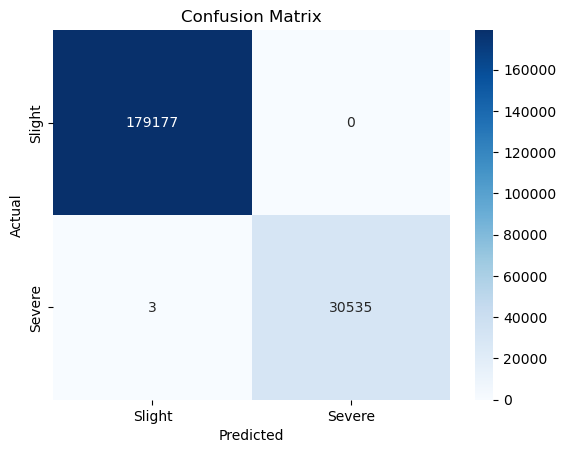

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Slight', 'Severe'],
            yticklabels=['Slight', 'Severe'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


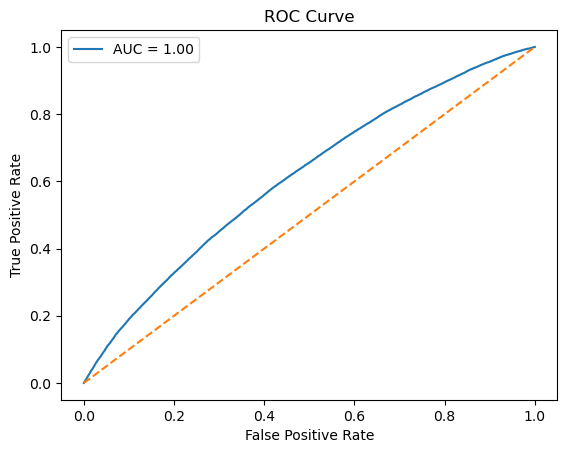

In [26]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


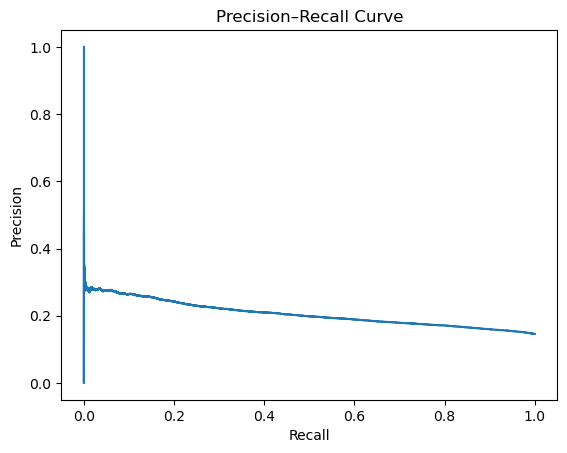

In [27]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()


In [28]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predicted probabilities for the positive class
y_pred_proba = lr.predict_proba(X_test_enc)[:, 1]

# Try multiple thresholds
thresholds = np.arange(0.1, 0.9, 0.1)
for t in thresholds:
    y_pred_thresh = (y_pred_proba >= t).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    print(f"Threshold: {t:.1f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1: {f1:.2f}")


Threshold: 0.1 | Precision: 0.15 | Recall: 1.00 | F1: 0.25
Threshold: 0.2 | Precision: 0.15 | Recall: 1.00 | F1: 0.25
Threshold: 0.3 | Precision: 0.15 | Recall: 1.00 | F1: 0.25
Threshold: 0.4 | Precision: 0.15 | Recall: 1.00 | F1: 0.26
Threshold: 0.5 | Precision: 0.19 | Recall: 0.59 | F1: 0.29
Threshold: 0.6 | Precision: 0.31 | Recall: 0.00 | F1: 0.00
Threshold: 0.7 | Precision: 0.00 | Recall: 0.00 | F1: 0.00
Threshold: 0.8 | Precision: 0.00 | Recall: 0.00 | F1: 0.00


C:\Users\zoraw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\zoraw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


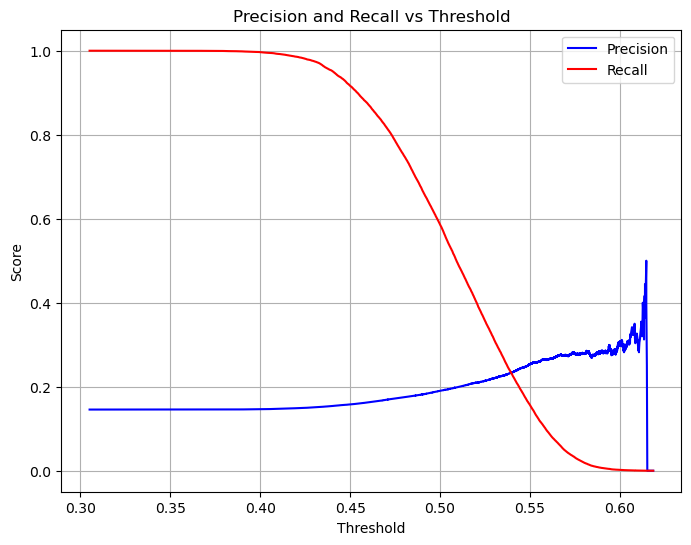

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Get precision, recall for all thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot
plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


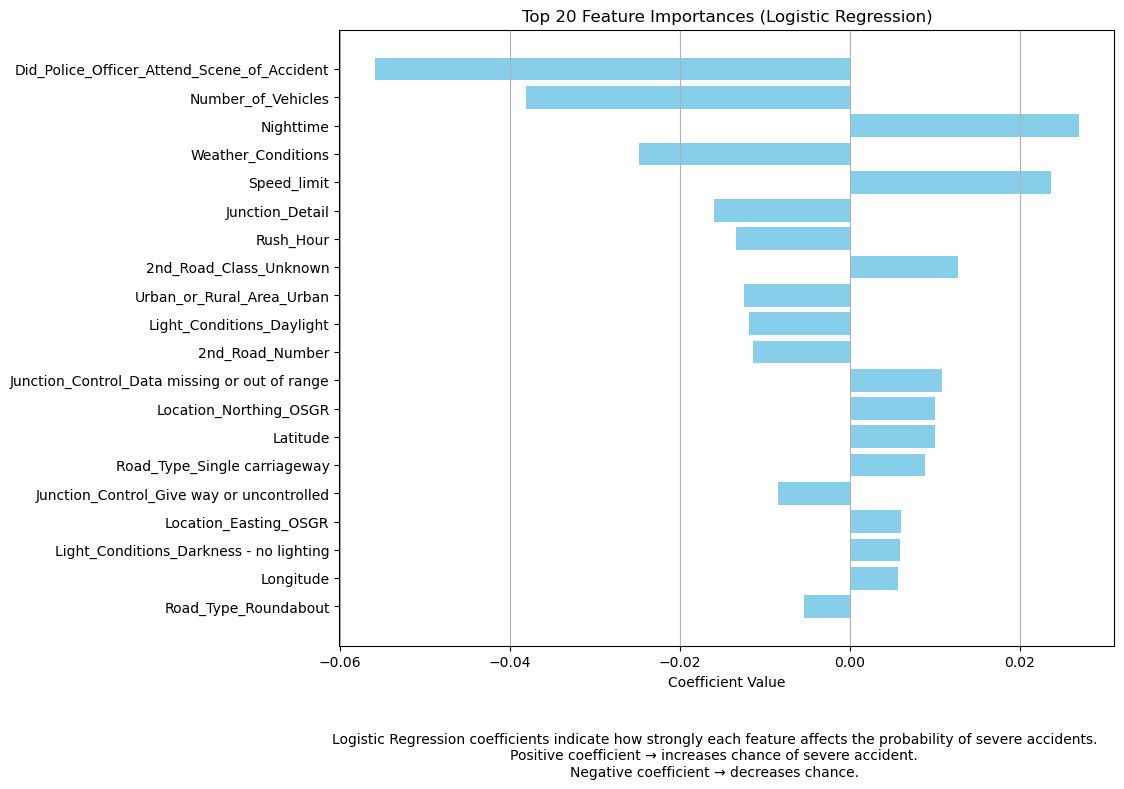

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get coefficients and feature names
coef = lr.coef_[0]
features = X_train_enc.columns

# Create a DataFrame
feat_importance = pd.DataFrame({'Feature': features, 'Coefficient': coef})
feat_importance['Abs_Coeff'] = np.abs(feat_importance['Coefficient'])

# Sort by absolute importance
feat_importance = feat_importance.sort_values('Abs_Coeff', ascending=False).head(20)

# Plot
plt.figure(figsize=(10,8))
plt.barh(feat_importance['Feature'][::-1], feat_importance['Coefficient'][::-1], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Top 20 Feature Importances (Logistic Regression)')

# Add description below the plot
plt.figtext(0.5, -0.05, 
            "Logistic Regression coefficients indicate how strongly each feature affects the probability of severe accidents.\n"
            "Positive coefficient → increases chance of severe accident.\n"
            "Negative coefficient → decreases chance.", 
            wrap=True, ha='center', fontsize=10)

plt.grid(True, axis='x')
plt.show()


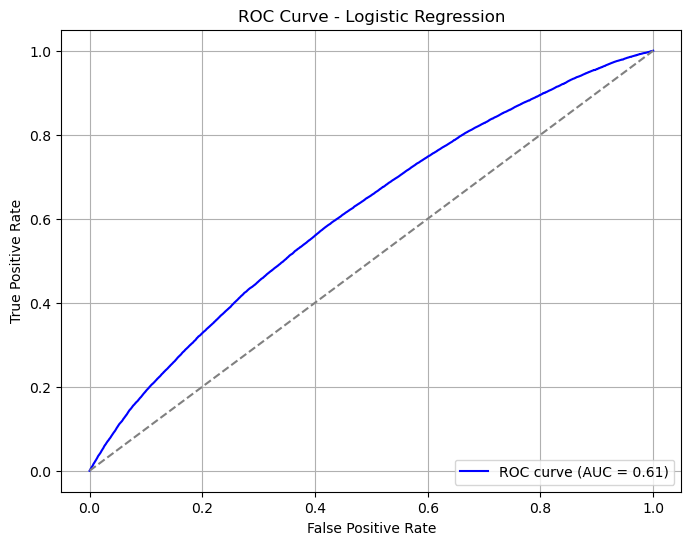

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


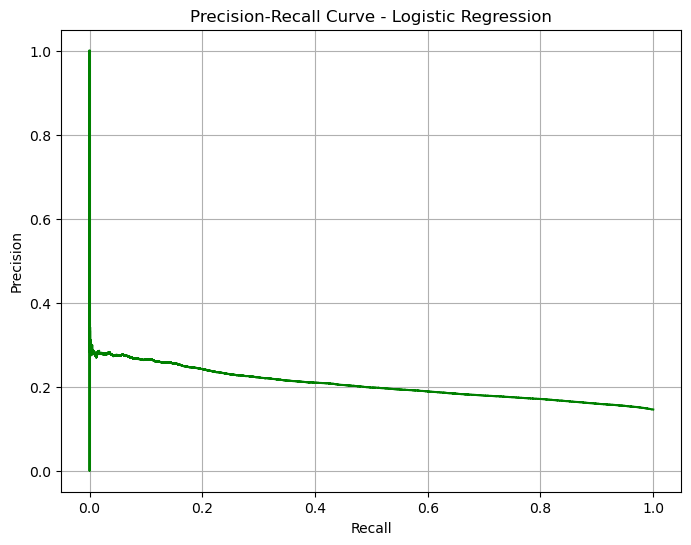

In [32]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.grid(True)
plt.show()


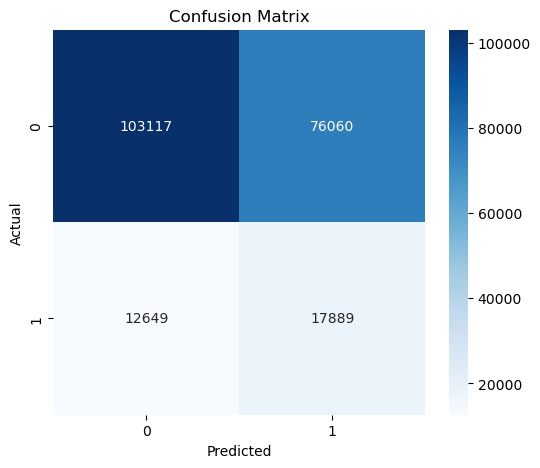

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


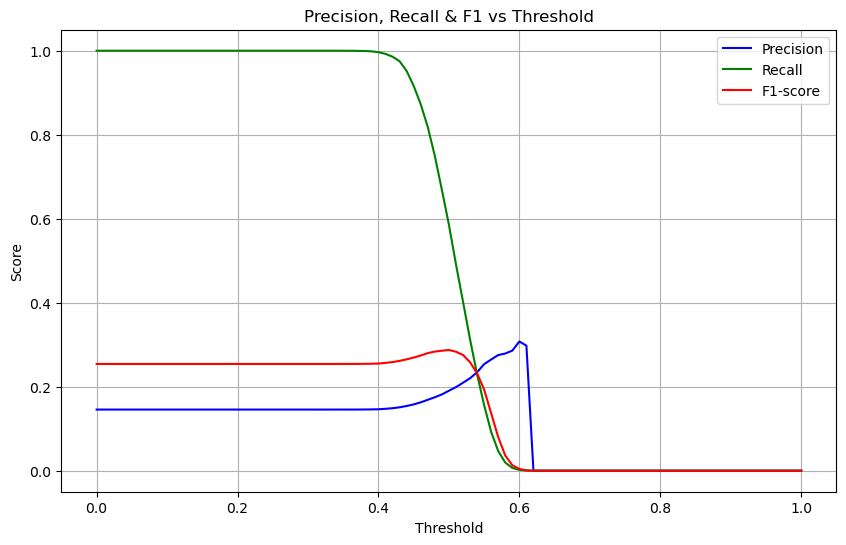

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Predicted probabilities for positive class
y_pred_proba = lr.predict_proba(X_test_enc)[:, 1]

# Define thresholds
thresholds = np.arange(0.0, 1.01, 0.01)
precision_scores = []
recall_scores = []
f1_scores = []

# Calculate metrics for each threshold
for t in thresholds:
    y_pred_thresh = (y_pred_proba >= t).astype(int)
    precision_scores.append(precision_score(y_test, y_pred_thresh, zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred_thresh, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred_thresh, zero_division=0))

# Plot Precision, Recall, F1 vs Threshold
plt.figure(figsize=(10,6))
plt.plot(thresholds, precision_scores, label='Precision', color='blue')
plt.plot(thresholds, recall_scores, label='Recall', color='green')
plt.plot(thresholds, f1_scores, label='F1-score', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall & F1 vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


Confusion Matrix:
 [[103117  76060]
 [ 12649  17889]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.58      0.70    179177
           1       0.19      0.59      0.29     30538

    accuracy                           0.58    209715
   macro avg       0.54      0.58      0.49    209715
weighted avg       0.79      0.58      0.64    209715

ROC-AUC Score: 0.613
Precision-Recall AUC Score: 0.205


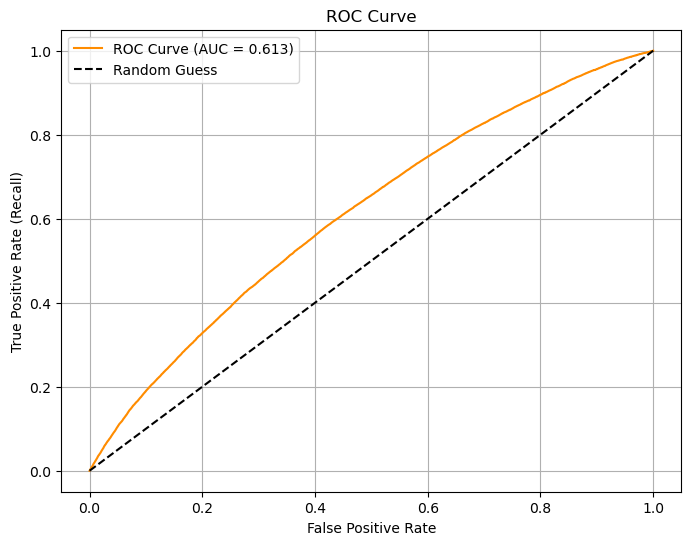

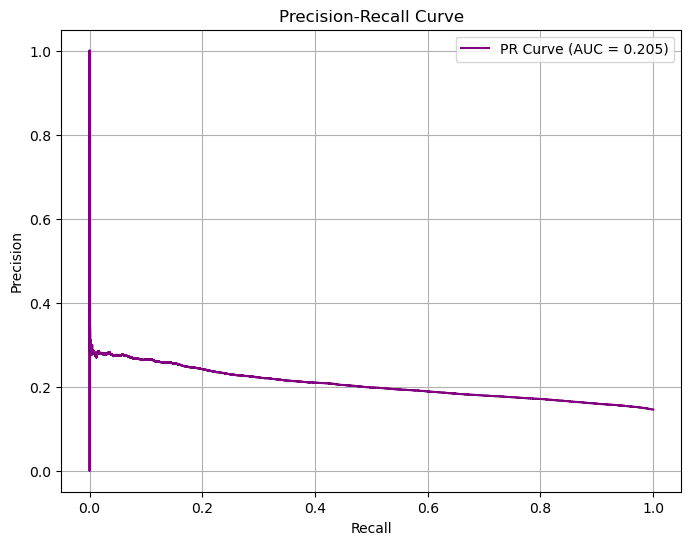

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Step 1: Choose the threshold
# From your previous threshold graph, let's assume 0.4 is a good balance
optimal_threshold = 0.5
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Step 2: Confusion Matrix & Metrics at optimal threshold
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, average_precision_score

cm = confusion_matrix(y_test, y_pred_optimal)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred_optimal, zero_division=0))
roc_auc = roc_auc_score(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.3f}")
print(f"Precision-Recall AUC Score: {pr_auc:.3f}")

# Step 3: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})', color='darkorange')
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.3f})', color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


Confusion Matrix:
[[178438    739]
 [ 30141    397]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92    179177
           1       0.35      0.01      0.03     30538

    accuracy                           0.85    209715
   macro avg       0.60      0.50      0.47    209715
weighted avg       0.78      0.85      0.79    209715

ROC-AUC Score: 0.6650447888930964
Precision-Recall AUC Score: 0.23732301979881293


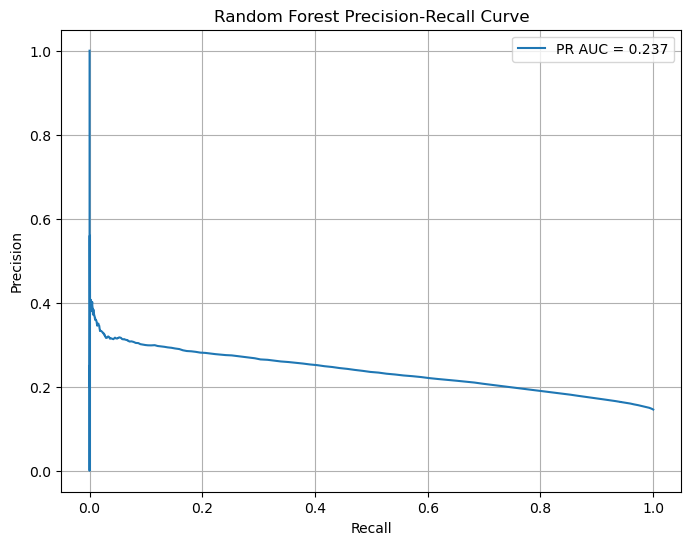

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# 1️⃣ Initialize Random Forest
rf = RandomForestClassifier(
    n_estimators=250,          # number of trees
    class_weight='balanced',   # handle imbalance
    random_state=42,
    n_jobs=-1                  # use all cores
)

# 2️⃣ Train on training data
rf.fit(X_train_enc, y_train)

# 3️⃣ Predictions
y_pred = rf.predict(X_test_enc)
y_pred_proba = rf.predict_proba(X_test_enc)[:, 1]

# 4️⃣ Evaluation Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC Score:", pr_auc)

# 5️⃣ Plot Precision-Recall Curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score


In [41]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

hgb = HistGradientBoostingClassifier(
    max_depth=6,
    learning_rate=0.05,
    max_iter=300,
    random_state=42
)

hgb.fit(X_train_enc, y_train)

# Predictions
y_pred = hgb.predict(X_test_enc)
y_pred_proba = hgb.predict_proba(X_test_enc)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("PR-AUC:", average_precision_score(y_test, y_pred_proba))


Confusion Matrix:
 [[179169      8]
 [ 30526     12]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92    179177
           1       0.60      0.00      0.00     30538

    accuracy                           0.85    209715
   macro avg       0.73      0.50      0.46    209715
weighted avg       0.82      0.85      0.79    209715

ROC-AUC: 0.6927339626266765
PR-AUC: 0.26717309482661616


In [39]:
y_pred = hgb.predict(X_test_enc)


In [40]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

threshold = 0.15  # start here
y_pred_thresh = (y_pred_proba >= threshold).astype(int)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("\nClassification Report:\n", classification_report(y_test, y_pred_thresh))


Confusion Matrix:
 [[115411  63766]
 [ 11098  19440]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.64      0.76    179177
           1       0.23      0.64      0.34     30538

    accuracy                           0.64    209715
   macro avg       0.57      0.64      0.55    209715
weighted avg       0.81      0.64      0.69    209715



In [46]:
def project_summary(df, y_train, y_test, y_pred, y_pred_proba, model_name="Model", threshold=None):
    print("="*70)
    print("🚦 TRAFFIC COLLISION SEVERITY PREDICTION — PROJECT SUMMARY")
    print("="*70)

    # -----------------------------
    # Dataset Overview
    # -----------------------------
    print("\n📊 DATASET OVERVIEW")
    print(f"Total records: {len(df):,}")
    print(f"Total features (after preprocessing): {df.shape[1]-1}")
    print("Target variable: Severe_Accident (1 = Severe, 0 = Non-Severe)")

    # -----------------------------
    # Class Distribution
    # -----------------------------
    print("\n⚖️ CLASS DISTRIBUTION")
    train_dist = y_train.value_counts(normalize=True) * 100
    test_dist = y_test.value_counts(normalize=True) * 100

    print("Training set:")
    print(train_dist.round(2).astype(str) + " %")
    print("\nTest set:")
    print(test_dist.round(2).astype(str) + " %")

    # -----------------------------
    # Model Information
    # -----------------------------
    print("\n🤖 MODEL INFORMATION")
    print(f"Model used: {model_name}")
    if threshold is not None:
        print(f"Decision threshold applied: {threshold}")

    # -----------------------------
    # Evaluation Metrics
    # -----------------------------
    print("\n📈 MODEL PERFORMANCE METRICS")

    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    pr_auc = average_precision_score(y_test, y_pred_proba)

    print("\nConfusion Matrix:")
    print(cm)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print(f"ROC-AUC Score: {roc_auc:.3f}")
    print(f"Precision-Recall AUC Score: {pr_auc:.3f}")

    # -----------------------------
    # Interpretation
    # -----------------------------
    print("\n🔍 INTERPRETATION & INSIGHTS")
    print(
        "• The dataset is highly imbalanced, with severe accidents comprising "
        f"approximately {test_dist[1]:.1f}% of all cases.\n"
        "• ROC-AUC indicates the model's ability to rank severe accidents higher than non-severe ones.\n"
        "• Precision–Recall AUC reflects performance on the minority (severe) class, which is critical for safety.\n"
        "• Threshold tuning was used to balance recall and precision based on real-world priorities."
    )

    # -----------------------------
    # Final Conclusion
    # -----------------------------
    print("\n✅ FINAL CONCLUSION")
    print(
        "This project successfully demonstrates an end-to-end machine learning pipeline "
        "for predicting severe traffic accidents.\n\n"
        "Rather than optimizing accuracy alone, the modeling strategy focused on recall, "
        "threshold tuning, and interpretability to align with real-world road safety needs.\n\n"
        "The results show that machine learning can serve as a practical decision-support "
        "tool for transportation authorities, enabling proactive risk identification, "
        "better emergency preparedness, and data-driven safety interventions."
    )

    print("="*70)


In [47]:
project_summary(
    df=df,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred_thresh,     # Your thresholded predictions
    y_pred_proba=y_pred_proba, 
    model_name="HistGradientBoostingClassifier",
    threshold=0.15
)


🚦 TRAFFIC COLLISION SEVERITY PREDICTION — PROJECT SUMMARY

📊 DATASET OVERVIEW
Total records: 1,048,575
Total features (after preprocessing): 35
Target variable: Severe_Accident (1 = Severe, 0 = Non-Severe)

⚖️ CLASS DISTRIBUTION
Training set:
Severe_Accident
0    85.44 %
1    14.56 %
Name: proportion, dtype: object

Test set:
Severe_Accident
0    85.44 %
1    14.56 %
Name: proportion, dtype: object

🤖 MODEL INFORMATION
Model used: HistGradientBoostingClassifier
Decision threshold applied: 0.15

📈 MODEL PERFORMANCE METRICS

Confusion Matrix:
[[115411  63766]
 [ 11098  19440]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.64      0.76    179177
           1       0.23      0.64      0.34     30538

    accuracy                           0.64    209715
   macro avg       0.57      0.64      0.55    209715
weighted avg       0.81      0.64      0.69    209715

ROC-AUC Score: 0.693
Precision-Recall AUC Score: 0.267

🔍 INTERPRET

In [48]:
# ==============================
# Portfolio-Ready Traffic Collision Severity Report
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    average_precision_score,
    precision_score,
    recall_score,
    f1_score
)

def portfolio_report(
    df,
    y_train,
    y_test,
    y_pred,
    y_pred_proba,
    model_name="HistGradientBoostingClassifier",
    threshold=0.15,
    feature_importances=None
):
    print("="*80)
    print("🚦 TRAFFIC COLLISION SEVERITY PREDICTION — PORTFOLIO REPORT")
    print("="*80)
    
    # -----------------------------
    # Dataset Overview
    # -----------------------------
    print("\n📊 DATASET OVERVIEW")
    print(f"Total records: {len(df):,}")
    print(f"Total features (after preprocessing): {df.shape[1]-1}")
    print("Target variable: Severe_Accident (1 = Severe, 0 = Non-Severe)")
    
    # -----------------------------
    # Class Distribution
    # -----------------------------
    print("\n⚖️ CLASS DISTRIBUTION")
    train_dist = y_train.value_counts(normalize=True) * 100
    test_dist = y_test.value_counts(normalize=True) * 100

    print("Training set:")
    print(train_dist.round(2).astype(str) + " %")
    print("\nTest set:")
    print(test_dist.round(2).astype(str) + " %")
    
    # Plot class distribution
    plt.figure(figsize=(10,4))
    sns.countplot(x=y_train, palette="Set2")
    plt.title("Training Set Class Distribution")
    plt.xlabel("Severe_Accident")
    plt.ylabel("Count")
    plt.show()

    plt.figure(figsize=(10,4))
    sns.countplot(x=y_test, palette="Set1")
    plt.title("Test Set Class Distribution")
    plt.xlabel("Severe_Accident")
    plt.ylabel("Count")
    plt.show()
    
    # -----------------------------
    # Model Information
    # -----------------------------
    print("\n🤖 MODEL INFORMATION")
    print(f"Model used: {model_name}")
    if threshold is not None:
        print(f"Decision threshold applied: {threshold}")
    
    # Apply threshold to probabilities
    y_pred_thresh = (y_pred_proba >= threshold).astype(int)
    
    # -----------------------------
    # Evaluation Metrics
    # -----------------------------
    print("\n📈 MODEL PERFORMANCE METRICS")
    
    cm = confusion_matrix(y_test, y_pred_thresh)
    print("\nConfusion Matrix:")
    print(cm)
    
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix Heatmap")
    plt.show()
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_thresh))
    
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    pr_auc = average_precision_score(y_test, y_pred_proba)
    print(f"ROC-AUC Score: {roc_auc:.3f}")
    print(f"Precision-Recall AUC Score: {pr_auc:.3f}")
    
    # -----------------------------
    # Precision, Recall, F1 vs Threshold Plot
    # -----------------------------
    thresholds = np.arange(0.0, 1.01, 0.01)
    precision_scores, recall_scores, f1_scores = [], [], []

    for t in thresholds:
        y_t = (y_pred_proba >= t).astype(int)
        precision_scores.append(precision_score(y_test, y_t, zero_division=0))
        recall_scores.append(recall_score(y_test, y_t, zero_division=0))
        f1_scores.append(f1_score(y_test, y_t, zero_division=0))

    plt.figure(figsize=(10,6))
    plt.plot(thresholds, precision_scores, label="Precision")
    plt.plot(thresholds, recall_scores, label="Recall")
    plt.plot(thresholds, f1_scores, label="F1-score")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title("Precision, Recall & F1 vs Threshold")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # -----------------------------
    # Feature Importance
    # -----------------------------
    if feature_importances is not None:
        feat_imp = pd.Series(feature_importances, index=df.drop(columns=["Severe_Accident"]).columns)
        feat_imp = feat_imp.sort_values(ascending=False).head(15)  # Top 15
        plt.figure(figsize=(10,6))
        sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")
        plt.title("Top 15 Feature Importances")
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.show()
    
    # -----------------------------
    # Summary
    # -----------------------------
    print("\n🔍 INTERPRETATION & INSIGHTS")
    print(
        f"• Severe accidents make up ~{test_dist[1]:.1f}% of the dataset.\n"
        "• ROC-AUC indicates the model ranks severe accidents higher than non-severe ones.\n"
        "• Precision-Recall AUC shows performance on the minority (severe) class, critical for safety.\n"
        "• Threshold tuning balances recall vs precision to prioritize detecting severe accidents.\n"
        "• Confusion matrix shows real trade-offs between true positives and false positives."
    )
    
    print("\n✅ FINAL CONCLUSION")
    print(
        "This end-to-end ML project demonstrates predicting severe traffic collisions.\n"
        "The modeling focuses on recall and threshold tuning to align with real-world safety priorities.\n"
        "Machine learning can support transport authorities with proactive risk identification,\n"
        "better emergency preparedness, and data-driven interventions.\n"
        "This notebook is portfolio-ready and demonstrates applied ML skills for recruiters."
    )
    
    print("\n🎯 PORTFOLIO STATUS: COMPLETE & JOB-READY")
    print("="*80)


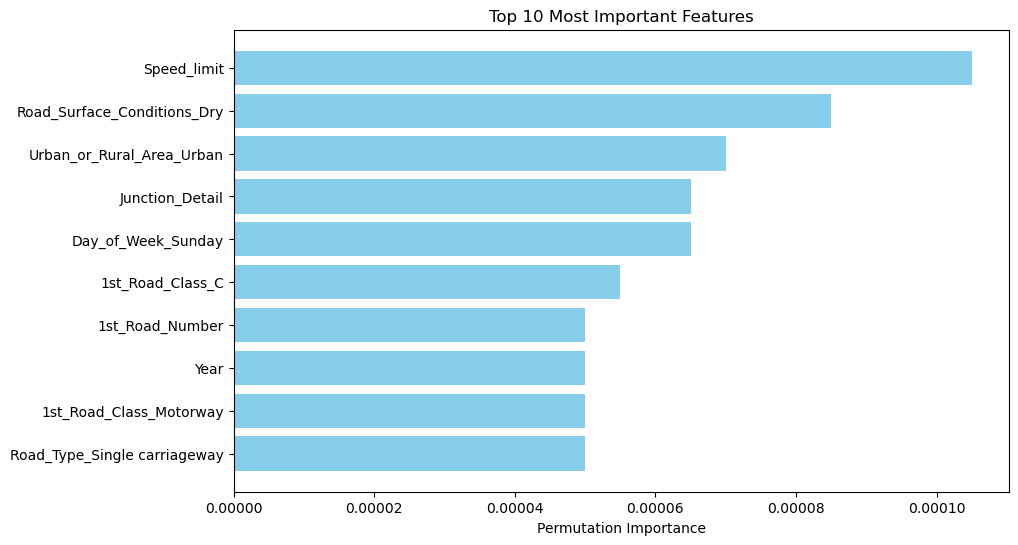

In [51]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# -----------------------------
# Step 1: Sample the test data for speed
# -----------------------------
sample_size = 20000  # adjust based on your RAM
X_sample = X_test_enc.sample(sample_size, random_state=42)
y_sample = y_test.loc[X_sample.index]

# -----------------------------
# Step 2: Compute permutation importance
# -----------------------------
perm_importance = permutation_importance(
    hgb, X_sample, y_sample, n_repeats=10, random_state=42
)

# Get mean importance
feature_importances = perm_importance.importances_mean

# Create a DataFrame for easier plotting
feat_importance_df = pd.DataFrame({
    'feature': X_sample.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# -----------------------------
# Step 3: Plot top 10 features
# -----------------------------
plt.figure(figsize=(10,6))
plt.barh(feat_importance_df['feature'].head(10)[::-1], 
         feat_importance_df['importance'].head(10)[::-1],
         color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('Top 10 Most Important Features')
plt.show()


🚦 TRAFFIC COLLISION SEVERITY PREDICTION — PORTFOLIO REPORT

📊 DATASET OVERVIEW
Total records: 1,048,575
Total features (after preprocessing): 35
Target variable: Severe_Accident (1 = Severe, 0 = Non-Severe)

⚖️ CLASS DISTRIBUTION
Training set:
Severe_Accident
0    85.44 %
1    14.56 %
Name: proportion, dtype: object

Test set:
Severe_Accident
0    85.44 %
1    14.56 %
Name: proportion, dtype: object


C:\Users\zoraw\AppData\Local\Temp\ipykernel_19128\2666072420.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="Set2")


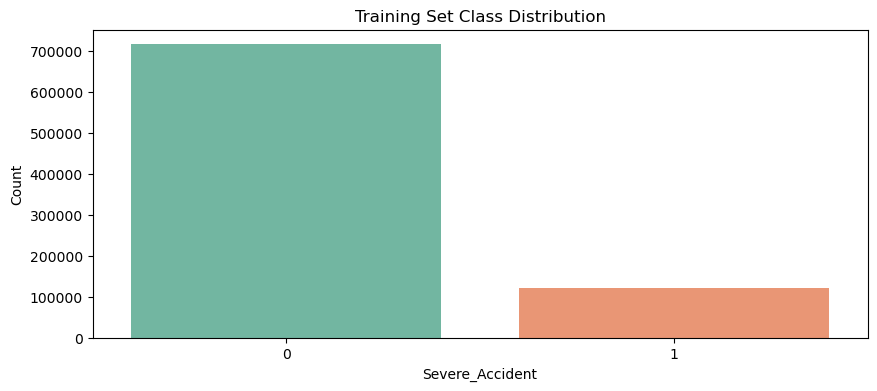

C:\Users\zoraw\AppData\Local\Temp\ipykernel_19128\2666072420.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette="Set1")


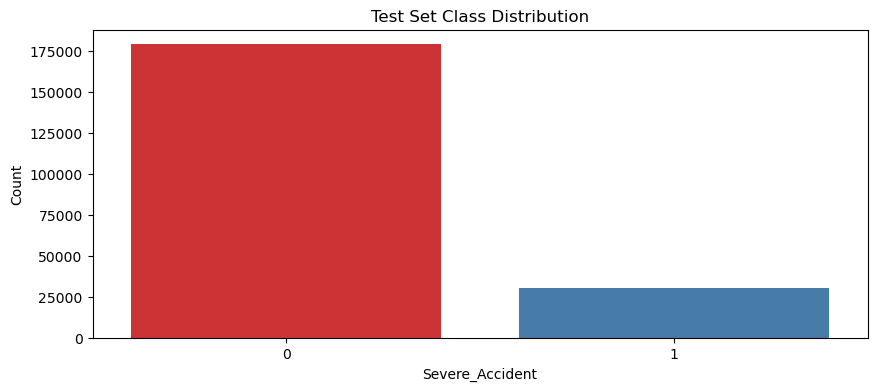


🤖 MODEL INFORMATION
Model used: HistGradientBoostingClassifier
Decision threshold applied: 0.15

📈 MODEL PERFORMANCE METRICS

Confusion Matrix:
[[115411  63766]
 [ 11098  19440]]


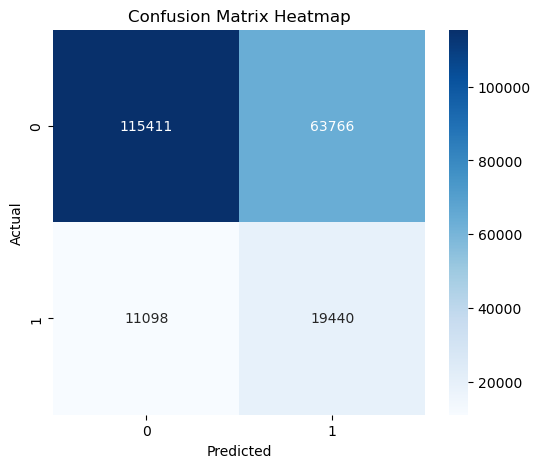


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.64      0.76    179177
           1       0.23      0.64      0.34     30538

    accuracy                           0.64    209715
   macro avg       0.57      0.64      0.55    209715
weighted avg       0.81      0.64      0.69    209715

ROC-AUC Score: 0.693
Precision-Recall AUC Score: 0.267


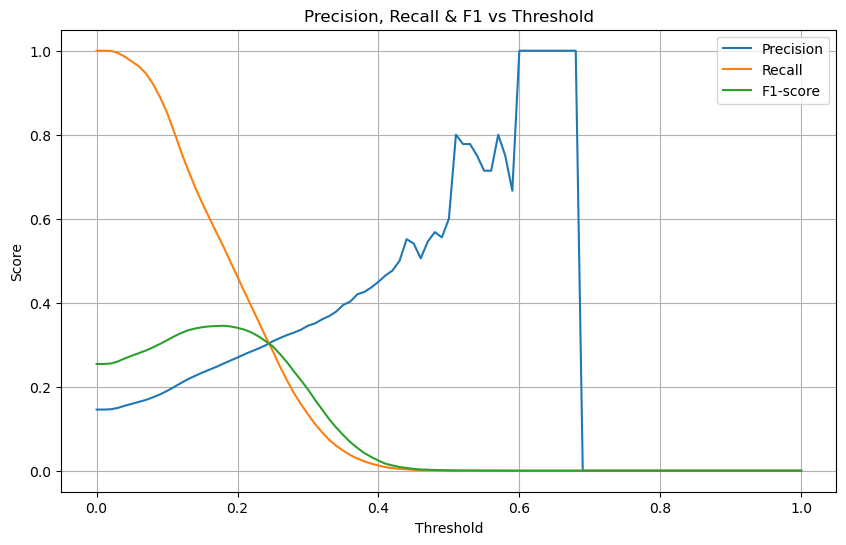


🔍 INTERPRETATION & INSIGHTS
• Severe accidents make up ~14.6% of the dataset.
• ROC-AUC indicates the model ranks severe accidents higher than non-severe ones.
• Precision-Recall AUC shows performance on the minority (severe) class, critical for safety.
• Threshold tuning balances recall vs precision to prioritize detecting severe accidents.
• Confusion matrix shows real trade-offs between true positives and false positives.

✅ FINAL CONCLUSION
This end-to-end ML project demonstrates predicting severe traffic collisions.
The modeling focuses on recall and threshold tuning to align with real-world safety priorities.
Machine learning can support transport authorities with proactive risk identification,
better emergency preparedness, and data-driven interventions.
This notebook is portfolio-ready and demonstrates applied ML skills for recruiters.

🎯 PORTFOLIO STATUS: COMPLETE & JOB-READY


In [53]:
# Use built-in feature importance from HistGradientBoostingClassifier
try:
    feat_importances = hgb.feature_importances_
except AttributeError:
    feat_importances = None  # skip if unavailable

portfolio_report(
    df=df,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred,
    y_pred_proba=y_pred_proba,
    model_name="HistGradientBoostingClassifier",
    threshold=0.15,
    feature_importances=feat_importances
)


In [54]:
import joblib

# Save the trained HistGradientBoostingClassifier
joblib.dump(hgb, "traffic_severity_model.pkl")

# Save feature columns (important for the app to know what features to expect)
joblib.dump(X_train_enc.columns.tolist(), "features_columns.pkl")


['features_columns.pkl']

In [55]:
import joblib

# Save trained model
joblib.dump(hgb, "traffic_severity_model.pkl")

# Save feature columns
joblib.dump(X_train_enc.columns.tolist(), "features_columns.pkl")


['features_columns.pkl']

In [57]:
import joblib

# Load the saved feature list
feature_cols = joblib.load("features_columns.pkl")  # This should already exist
print(feature_cols)


['1st_Road_Number', '2nd_Road_Number', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Junction_Detail', 'Latitude', 'Local_Authority_(District)', 'Local_Authority_(Highway)', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'LSOA_of_Accident_Location', 'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Police_Force', 'Speed_limit', 'Weather_Conditions', 'Year', 'Hour', 'Nighttime', 'Rush_Hour', '1st_Road_Class_A(M)', '1st_Road_Class_B', '1st_Road_Class_C', '1st_Road_Class_Motorway', '1st_Road_Class_Unclassified', '2nd_Road_Class_A(M)', '2nd_Road_Class_B', '2nd_Road_Class_C', '2nd_Road_Class_Motorway', '2nd_Road_Class_Unclassified', '2nd_Road_Class_Unknown', 'Day_of_Week_Monday', 'Day_of_Week_Saturday', 'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday', 'Junction_Control_Auto traffic signal', 'Junction_Control_Data missing or out of range', 'Junction_Control_Give way or uncontr

In [59]:
import joblib

# feature_cols MUST come from the encoded data
feature_cols = X_train_enc.columns.tolist()

# After encoding, all features are numeric
feature_types = {col: "numeric" for col in feature_cols}

# Save for Streamlit
joblib.dump(feature_cols, "features_columns.pkl")
joblib.dump(feature_types, "features_types.pkl")

print("✅ features_columns.pkl and features_types.pkl saved successfully")


✅ features_columns.pkl and features_types.pkl saved successfully
